# Decision Trees 

Decision Tree is one of the popular and most widely used Machine Learning Algorithms because of its robustness to noise, tolerance against missing information, handling of irrelevant, redundant predictive attribute values, low computational cost, interpretability, fast run time and robust predictors.

## Data Aquisition and Formating

In [22]:
import pandas as pd

In [23]:
df=pd.read_csv('Fish.csv')

The object has properties where you can access its atributes.

In [24]:
print(df['Species'].unique())


['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [25]:
print(df.groupby('Species').size())


Species
Bream        35
Parkki       11
Perch        56
Pike         17
Roach        20
Smelt        14
Whitefish     6
dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


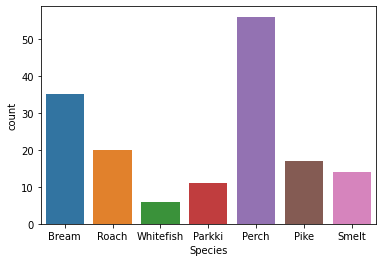

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(df['Species'],label="Count")
plt.show()

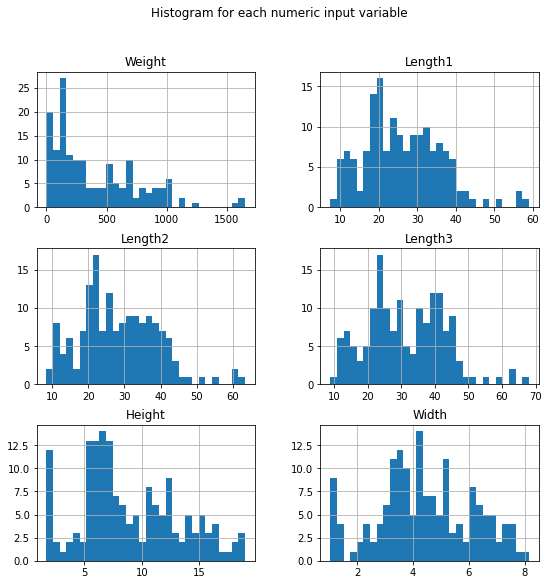

In [27]:
import pylab as pl
df.drop('Species' ,axis=1).hist(bins=30, figsize=(9,9))
pl.suptitle("Histogram for each numeric input variable")
plt.savefig('Fish_hist')
plt.show()

Let's work with Pandas Dataframe from now on....

In [28]:
print(X)

     Weight  Length1  Length2  Length3   Height   Width
0     242.0     23.2     25.4     30.0  11.5200  4.0200
1     290.0     24.0     26.3     31.2  12.4800  4.3056
2     340.0     23.9     26.5     31.1  12.3778  4.6961
3     363.0     26.3     29.0     33.5  12.7300  4.4555
4     430.0     26.5     29.0     34.0  12.4440  5.1340
..      ...      ...      ...      ...      ...     ...
154    12.2     11.5     12.2     13.4   2.0904  1.3936
155    13.4     11.7     12.4     13.5   2.4300  1.2690
156    12.2     12.1     13.0     13.8   2.2770  1.2558
157    19.7     13.2     14.3     15.2   2.8728  2.0672
158    19.9     13.8     15.0     16.2   2.9322  1.8792

[159 rows x 6 columns]


In [29]:
print(y)

0      Bream
1      Bream
2      Bream
3      Bream
4      Bream
       ...  
154    Smelt
155    Smelt
156    Smelt
157    Smelt
158    Smelt
Name: Species, Length: 159, dtype: object


In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Convert bunch-object to pandas dataframe

In [31]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.70


In [32]:
fish_classifier = DecisionTreeClassifier()
fish_classifier.fit(X,y)

DecisionTreeClassifier()

In [33]:
sample_one_pred_tree1 = (fish_classifier.predict([[55, 13, 14, 16,8,2]]))
#print(sample_one_pred_tree1)
print(f" Sample most likely  a {sample_one_pred_tree1} Fish.")

 Sample most likely  a ['Parkki'] Fish.


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [34]:
import pickle
pickle_out = open("fish_classifier.pkl","wb")
pickle.dump(fish_classifier,pickle_out)
pickle_out.close()

In [35]:
 # Load the model from disk
loaded_model = pickle.load(open("fish_classifier.pkl", 'rb'))

In [37]:
sample_one_pred_tree1 = (loaded_model.predict([[55, 13, 14, 16,8,2]]))
print(f" Sample most likely  a {sample_one_pred_tree1} Fish.")

 Sample most likely  a ['Parkki'] Fish.


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
